In [1]:
import zarr
import zarr.storage
import s3fs
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_1d_profiles(profiles: xr.Dataset):
    """Helper function for plotting 1D profiles"""
    n = int(np.ceil(len(profiles.data_vars) / 2))
    fig, axes = plt.subplots(n, 2, figsize=(10, 2*n))
    axes = axes.flatten()

    for i, name in enumerate(profiles.data_vars.keys()):
        profiles[name].plot(x='time', ax=axes[i])

    for ax in axes:
        ax.grid('on', alpha=0.5)
        ax.set_xlim(profiles.time.min(), profiles.time.max())

    plt.tight_layout()

In [2]:
shot_id = 30421
# shot_id = 48912
# endpoint_url = 'https://s3.echo.stfc.ac.uk'
# url = f's3://mast/test/level2/shots/{shot_id}.zarr'
# fs = s3fs.S3FileSystem(anon=True, endpoint_url=endpoint_url)
# store =zarr.storage.FSStore(fs=fs, url=url)

# store = zarr.storage.DirectoryStore(f'/common/tmp/sjackson/upload-tmp/zarr/level2/{shot_id}.zarr')
store = zarr.storage.DirectoryStore(f'./data-test/{shot_id}.zarr')

### Pulse Schedule Profiles

<xarray.Dataset> Size: 70kB
Dimensions:   (time: 2906)
Coordinates:
  * time      (time) float64 23kB -0.0612 -0.06095 -0.0607 ... 0.6648 0.665
Data variables:
    i_plasma  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    n_e_line  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
Attributes:
    description:  
    imas:         pulse_schedule
    label:        /xdc/ip/t/ipref
    name:         pulse_schedule
    uda_name:     /xdc/ip/t/ipref
    units:        A

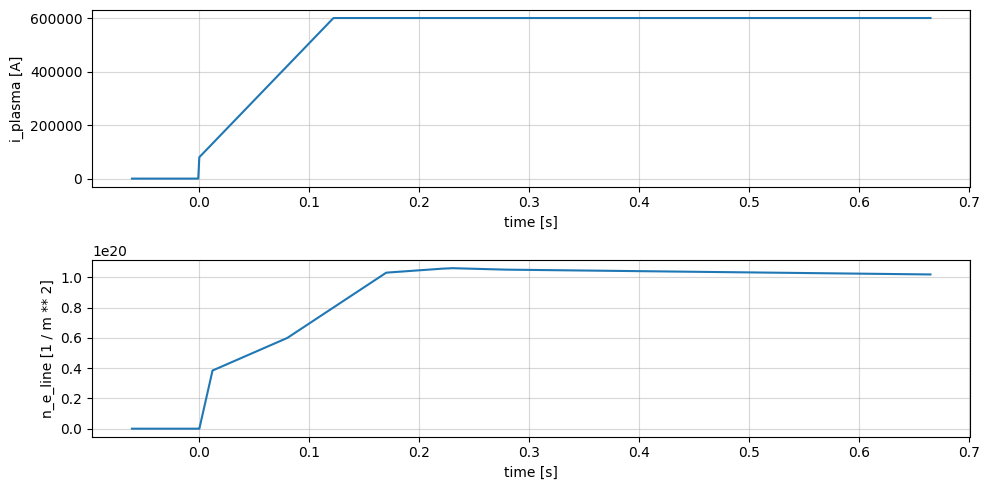

In [41]:
profiles = xr.open_zarr(store, group='pulse_schedule')

fig, axes = plt.subplots(2, 1, figsize=(10, 5))
axes = axes.flatten()
profiles['i_plasma'].plot(x='time', ax=axes[0])
profiles['n_e_line'].plot(x='time', ax=axes[1])
# profiles['vertical_control'].plot(x='time', ax=axes[2])

# for i in range(len(profiles.gas_channel)):
#     profiles['gas'].isel(gas_channel=i).plot(x='time', ax=axes[3])

for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()

profiles

### Summary Profiles

<xarray.Dataset> Size: 139kB
Dimensions:              (time: 2906)
Coordinates:
  * time                 (time) float64 23kB -0.0612 -0.06095 ... 0.6648 0.665
Data variables:
    ip                   (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    line_average_n_e     (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    neutron_rates_total  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    power_nbi            (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    power_radiated       (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
Attributes:
    description:  
    imas:         summary
    label:        Plasma Current
    name:         summary
    uda_name:     AMC_PLASMA CURRENT
    units:        A

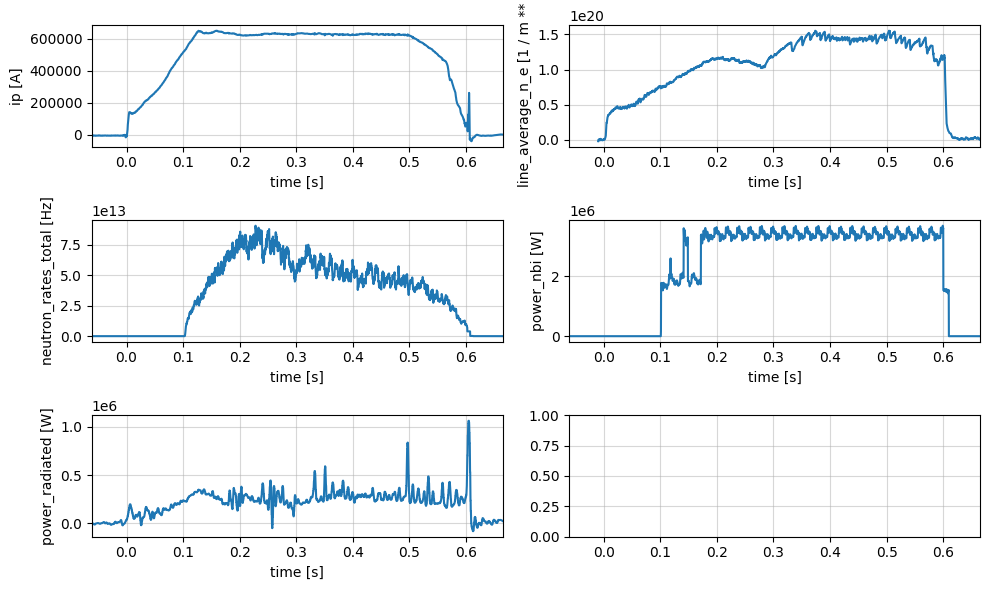

In [40]:
profiles = xr.open_zarr(store, group='summary')

plot_1d_profiles(profiles)
profiles

### Magnetics

<xarray.Dataset> Size: 342MB
Dimensions:                           (b_field_pol_probe_cc_channel: 5,
                                       time_mirnov: 363201,
                                       b_field_pol_probe_ccbv_channel: 40,
                                       time: 3633,
                                       b_field_pol_probe_obr_channel: 18,
                                       b_field_pol_probe_obv_channel: 18,
                                       b_field_pol_probe_omv_channel: 3,
                                       b_field_tor_probe_cc_channel: 3,
                                       b_field_tor_probe_omaha_channel: 4,
                                       time_omaha: 7264001,
                                       b_field_tor_probe_saddle_channel: 24,
                                       time_saddle: 36321, flux_loop_channel: 15)
Coordinates: (12/13)
  * b_field_pol_probe_cc_channel      (b_field_pol_probe_cc_channel) <U13 260B ...
  * b_field_pol_probe_ccbv_channel    (b_field_pol_probe_ccbv_channel) <U10 2kB ...
  * b_field_pol_probe_obr_channel     (b_field_pol_probe_obr_channel) <U9 648B ...
  * b_field_pol_probe_obv_channel     (b_field_pol_probe_obv_channel) <U9 648B ...
  * b_field_pol_probe_omv_channel     (b_field_pol_probe_omv_channel) <U11 132B ...
  * b_field_tor_probe_cc_channel      (b_field_tor_probe_cc_channel) <U13 156B ...
    ...                                ...
  * b_field_tor_probe_saddle_channel  (b_field_tor_probe_saddle_channel) <U15 1kB ...
  * flux_loop_channel                 (flux_loop_channel) <U12 720B 'AMB_FL/C...
  * time                              (time) float64 29kB -0.0612 ... 0.6652
  * time_mirnov                       (time_mirnov) float64 3MB -0.0612 ... 0...
  * time_omaha                        (time_omaha) float64 58MB -0.0612 ... 0...
  * time_saddle                       (time_saddle) float64 291kB -0.0612 ......
Data variables:
    b_field_pol_probe_cc_field        (b_field_pol_probe_cc_channel, time_mirnov) float64 15MB dask.array<chunksize=(1, 90801), meta=np.ndarray>
    b_field_pol_probe_ccbv_field      (b_field_pol_probe_ccbv_channel, time) float64 1MB dask.array<chunksize=(20, 1817), meta=np.ndarray>
    b_field_pol_probe_obr_field       (b_field_pol_probe_obr_channel, time) float64 523kB dask.array<chunksize=(9, 3633), meta=np.ndarray>
    b_field_pol_probe_obv_field       (b_field_pol_probe_obv_channel, time) float64 523kB dask.array<chunksize=(9, 3633), meta=np.ndarray>
    b_field_pol_probe_omv_voltage     (b_field_pol_probe_omv_channel, time_mirnov) float64 9MB dask.array<chunksize=(1, 90801), meta=np.ndarray>
    b_field_tor_probe_cc_field        (b_field_tor_probe_cc_channel, time_mirnov) float64 9MB dask.array<chunksize=(1, 90801), meta=np.ndarray>
    b_field_tor_probe_omaha_voltage   (b_field_tor_probe_omaha_channel, time_omaha) float64 232MB dask.array<chunksize=(1, 227001), meta=np.ndarray>
    b_field_tor_probe_saddle_field    (b_field_tor_probe_saddle_channel, time_saddle) float64 7MB dask.array<chunksize=(6, 9081), meta=np.ndarray>
    b_field_tor_probe_saddle_voltage  (b_field_tor_probe_saddle_channel, time_saddle) float64 7MB dask.array<chunksize=(6, 9081), meta=np.ndarray>
    flux_loop_flux                    (flux_loop_channel, time) float64 436kB dask.array<chunksize=(8, 3633), meta=np.ndarray>
    ip                                (time) float64 29kB dask.array<chunksize=(3633,), meta=np.ndarray>
Attributes:
    description:  
    imas:         magnetics
    label:        Plasma Current
    name:         magnetics
    uda_name:     AMC_PLASMA CURRENT
    units:        A

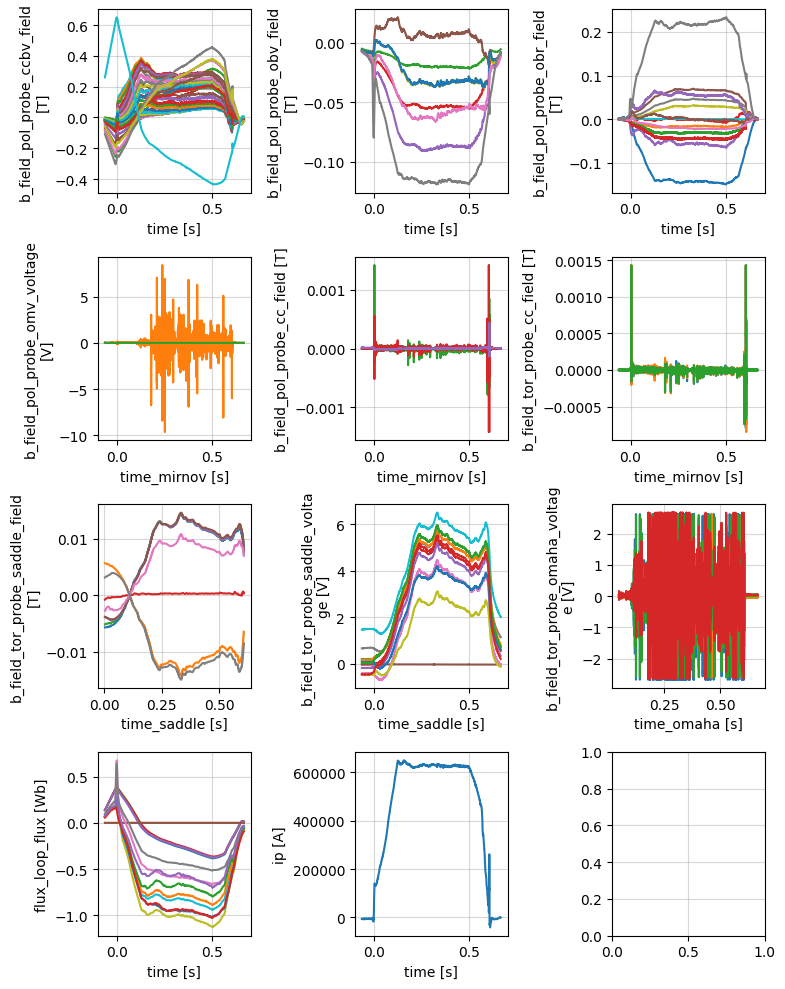

In [6]:
profiles = xr.open_zarr(store, group='magnetics')

fig, axes = plt.subplots(4, 3, figsize=(8, 10))
axes = axes.flatten()

profiles['b_field_pol_probe_ccbv_field'].plot.line(x='time', ax=axes[0], add_legend=False)
profiles['b_field_pol_probe_obv_field'].plot.line(x='time', ax=axes[1], add_legend=False)
profiles['b_field_pol_probe_obr_field'].plot.line(x='time', ax=axes[2], add_legend=False)


profiles['b_field_pol_probe_omv_voltage'].plot.line(x='time_mirnov', ax=axes[3], add_legend=False)
profiles['b_field_pol_probe_cc_field'].plot.line(x='time_mirnov', ax=axes[4], add_legend=False)
profiles['b_field_tor_probe_cc_field'].plot.line(x='time_mirnov', ax=axes[5], add_legend=False)

profiles['b_field_tor_probe_saddle_field'].plot.line(x='time_saddle', ax=axes[6], add_legend=False)
profiles['b_field_tor_probe_saddle_voltage'].plot.line(x='time_saddle', ax=axes[7], add_legend=False)
profiles['b_field_tor_probe_omaha_voltage'].plot.line(x='time_omaha', ax=axes[8], add_legend=False)

profiles['flux_loop_flux'].plot.line(x='time', ax=axes[9], add_legend=False)
# profiles['rogowski_coil_current'].plot.line(x='time', ax=axes[10], add_legend=False)
profiles['ip'].plot.line(x='time', ax=axes[10], add_legend=False)

for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()

profiles

### Spectrometer Visible

5.000000000005e-07

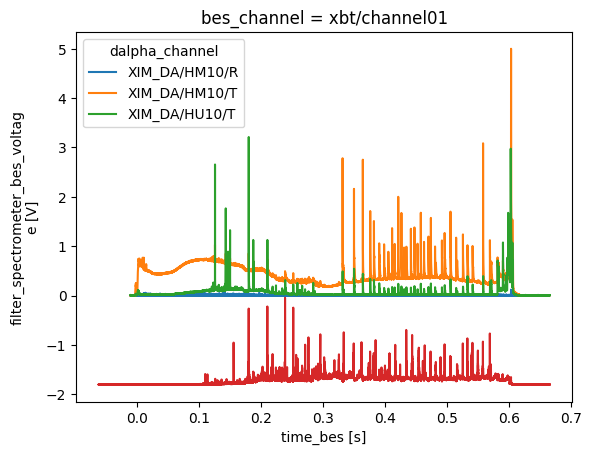

In [39]:
profiles = xr.open_zarr(store, group='spectrometer_visible')
profiles['filter_spectrometer_dalpha_voltage'].plot.line(x='time')
profiles['filter_spectrometer_bes_voltage'].isel(bes_channel=0).plot.line(x='time_bes')
profiles

c = profiles.filter_spectrometer_bes_voltage.isel(bes_channel=0)
c.time_bes.values[1] - c.time_bes.values[0]

### PF Active

<xarray.Dataset> Size: 699kB
Dimensions:           (channel: 14, time: 2906)
Coordinates:
  * channel           (channel) <U21 1kB '/xdc/pf/f/p1' ... 'AMC_P5U FEED CUR...
  * time              (time) float64 23kB -0.0612 -0.06095 ... 0.6648 0.665
Data variables:
    coil_current      (channel, time) float64 325kB dask.array<chunksize=(7, 2906), meta=np.ndarray>
    coil_voltage      (channel, time) float64 325kB dask.array<chunksize=(7, 2906), meta=np.ndarray>
    solenoid_current  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
Attributes:
    description:  
    imas:         pf_active
    label:        Sol Current
    name:         pf_active
    uda_name:     AMC_SOL CURRENT
    units:        A

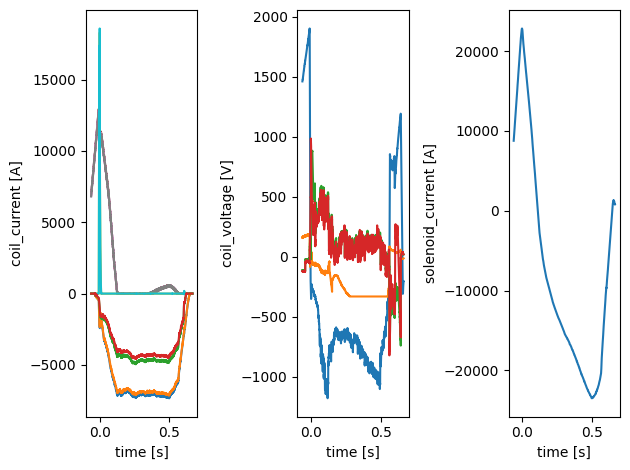

In [42]:
profiles = xr.open_zarr(store, group='pf_active')
fig, axes = plt.subplots(1, 3)
axes = axes.flatten()

profiles['coil_current'].plot.line(x='time', ax=axes[0], add_legend=False)
profiles['coil_voltage'].plot.line(x='time', ax=axes[1], add_legend=False)
profiles['solenoid_current'].plot.line(x='time', ax=axes[2], add_legend=False)

plt.tight_layout()
profiles

### Soft X-rays

<xarray.Dataset> Size: 160MB
Dimensions:                       (horizontal_cam_lower_channel: 18,
                                   time: 363201,
                                   horizontal_cam_upper_channel: 18,
                                   tangential_cam_channel: 18)
Coordinates:
  * horizontal_cam_lower_channel  (horizontal_cam_lower_channel) <U14 1kB '/x...
  * horizontal_cam_upper_channel  (horizontal_cam_upper_channel) <U14 1kB '/x...
  * tangential_cam_channel        (tangential_cam_channel) <U12 864B '/xsx/TC...
  * time                          (time) float64 3MB -0.0612 -0.0612 ... 0.6652
Data variables:
    horizontal_cam_lower          (horizontal_cam_lower_channel, time) float64 52MB dask.array<chunksize=(3, 45401), meta=np.ndarray>
    horizontal_cam_upper          (horizontal_cam_upper_channel, time) float64 52MB dask.array<chunksize=(3, 45401), meta=np.ndarray>
    tangential_cam                (tangential_cam_channel, time) float64 52MB dask.array<chunksize=(3, 45401), meta=np.ndarray>
Attributes:
    description:  
    imas:         None
    label:        Volt
    name:         soft_x_rays
    uda_name:     /xsx/TCAM/1
    units:        V

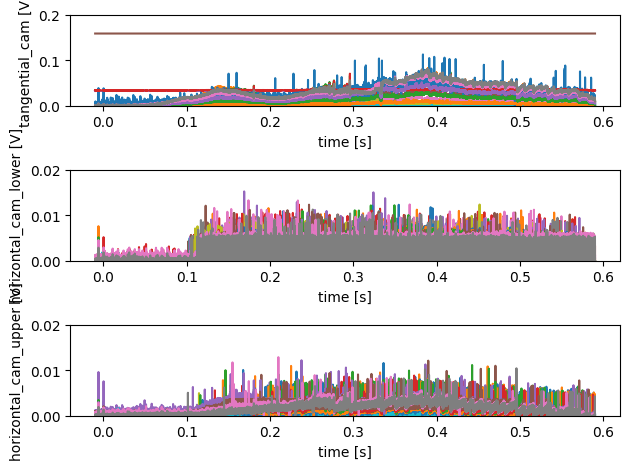

In [10]:
profiles = xr.open_zarr(store, group='soft_x_rays')
fig, axes = plt.subplots(3, 1)


profiles['horizontal_cam_lower'].plot.line(x='time', ax=axes[1], add_legend=False)
axes[1].set_ylim(0, 0.02)

profiles['horizontal_cam_upper'].plot.line(x='time', ax=axes[2], add_legend=False)
axes[2].set_ylim(0, 0.02)

if "tangential_cam" in profiles:
    profiles['tangential_cam'].plot.line(x='time', ax=axes[0], add_legend=False)
    axes[0].set_ylim(0, 0.2)

plt.tight_layout()
profiles

### Thomson Profiles

<xarray.Dataset> Size: 425kB
Dimensions:       (major_radius: 120, time: 146)
Coordinates:
  * major_radius  (major_radius) float64 960B 0.3 0.31 0.32 ... 1.47 1.48 1.49
  * time          (time) float64 1kB -0.0612 -0.0562 -0.0512 ... 0.6588 0.6638
Data variables:
    n_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    n_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    p_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
Attributes:
    description:  
    imas:         thomson_scattering
    label:        core temperature
    name:         thomson_scattering
    uda_name:     AYC_TE_CORE
    units:        eV

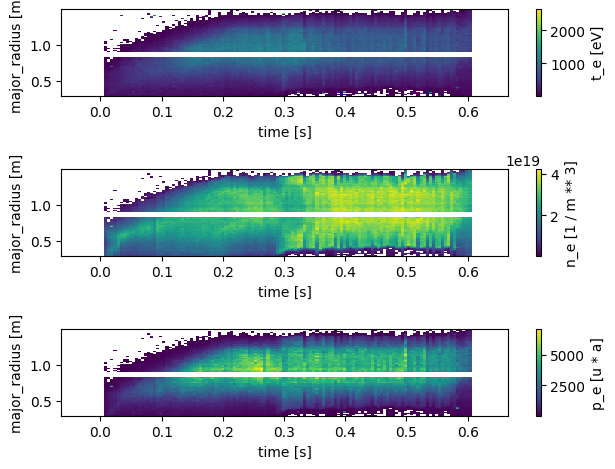

In [14]:
profiles = xr.open_zarr(store, group='thomson_scattering')
profiles

fig, axes = plt.subplots(3, 1)
axes = axes.flatten()
profiles.t_e.plot(x='time', y='major_radius', ax=axes[0])
profiles.n_e.plot(x='time', y='major_radius', ax=axes[1])
profiles.p_e.plot(x='time', y='major_radius', ax=axes[2])
plt.tight_layout()

profiles

<xarray.Dataset> Size: 425kB
Dimensions:       (major_radius: 120, time: 146)
Coordinates:
  * major_radius  (major_radius) float64 960B 0.3 0.31 0.32 ... 1.47 1.48 1.49
  * time          (time) float64 1kB -0.0612 -0.0562 -0.0512 ... 0.6588 0.6638
Data variables:
    n_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    n_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    p_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e           (time, major_radius) float64 140kB dask.array<chunksize=(146, 120), meta=np.ndarray>
    t_e_core      (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
Attributes:
    description:  
    imas:         thomson_scattering
    label:        core temperature
    name:         thomson_scattering
    uda_name:     AYC_TE_CORE
    units:        eV

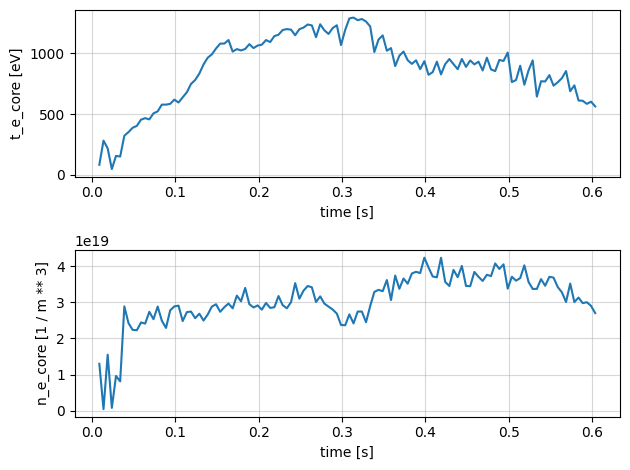

In [15]:
fig, axes = plt.subplots(2, 1)
profiles['t_e_core'].plot(x='time', ax=axes[0])
profiles['n_e_core'].plot(x='time', ax=axes[1])
for ax in axes:
    ax.grid('on', alpha=0.5)
plt.tight_layout()
profiles

### CXRS Profiles

<xarray.Dataset> Size: 189kB
Dimensions:       (major_radius: 160, time: 73)
Coordinates:
  * major_radius  (major_radius) float64 1kB 0.0 0.01 0.02 ... 1.57 1.58 1.59
  * time          (time) float64 584B -0.0612 -0.0512 -0.0412 ... 0.6488 0.6588
Data variables:
    t_i           (time, major_radius) float64 93kB dask.array<chunksize=(73, 160), meta=np.ndarray>
    v_i           (time, major_radius) float64 93kB dask.array<chunksize=(73, 160), meta=np.ndarray>
Attributes:
    description:  
    imas:         charge_exchange
    label:        Carbon temperature
    name:         charge_exchange
    uda_name:     ACT_SS_TEMPERATURE
    units:        eV

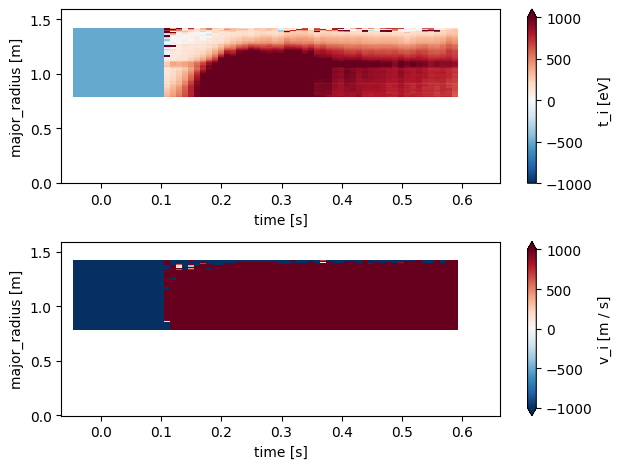

In [16]:
profiles = xr.open_zarr(store, group='charge_exchange')

fig, axes = plt.subplots(2, 1)
profiles['t_i'].plot(x='time', y='major_radius', ax=axes[0], vmax=1000)
profiles['v_i'].plot(x='time', y='major_radius', ax=axes[1], vmax=1000)
plt.tight_layout()
profiles

### Equilibrium

<xarray.Dataset> Size: 10MB
Dimensions:              (time: 146, z: 65, major_radius: 65,
                          n_boundary_coords: 139, n_x_points: 4, profile_r: 65)
Coordinates:
  * major_radius         (major_radius) float64 520B 0.06 0.09 ... 1.95 1.98
  * n_boundary_coords    (n_boundary_coords) float32 556B 0.0 1.0 ... 138.0
  * n_x_points           (n_x_points) <U16 256B 'EFM_XPOINT1_R(C)' ... 'EFM_X...
  * profile_r            (profile_r) float32 260B 0.0 0.01562 ... 0.9844 1.0
  * time                 (time) float64 1kB -0.0612 -0.0562 ... 0.6588 0.6638
  * z                    (z) float32 260B -2.0 -1.938 -1.875 ... 1.875 1.938 2.0
Data variables: (12/35)
    beta_normal          (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    beta_pol             (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    beta_tor             (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    bphi_rmag            (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    bvac_rmag            (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    da_rating            (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    ...                   ...
    triangularity_upper  (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    vloop_dynamic        (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    vloop_static         (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    whmd                 (time) float64 1kB dask.array<chunksize=(146,), meta=np.ndarray>
    x_point_r            (n_x_points, time) float64 5kB dask.array<chunksize=(4, 146), meta=np.ndarray>
    x_point_z            (n_x_points, time) float64 5kB dask.array<chunksize=(4, 146), meta=np.ndarray>
Attributes:
    description:  
    imas:         equilibrium
    label:        q(r) at z=0.
    name:         equilibrium
    uda_name:     EFM_Q(R)
    units:

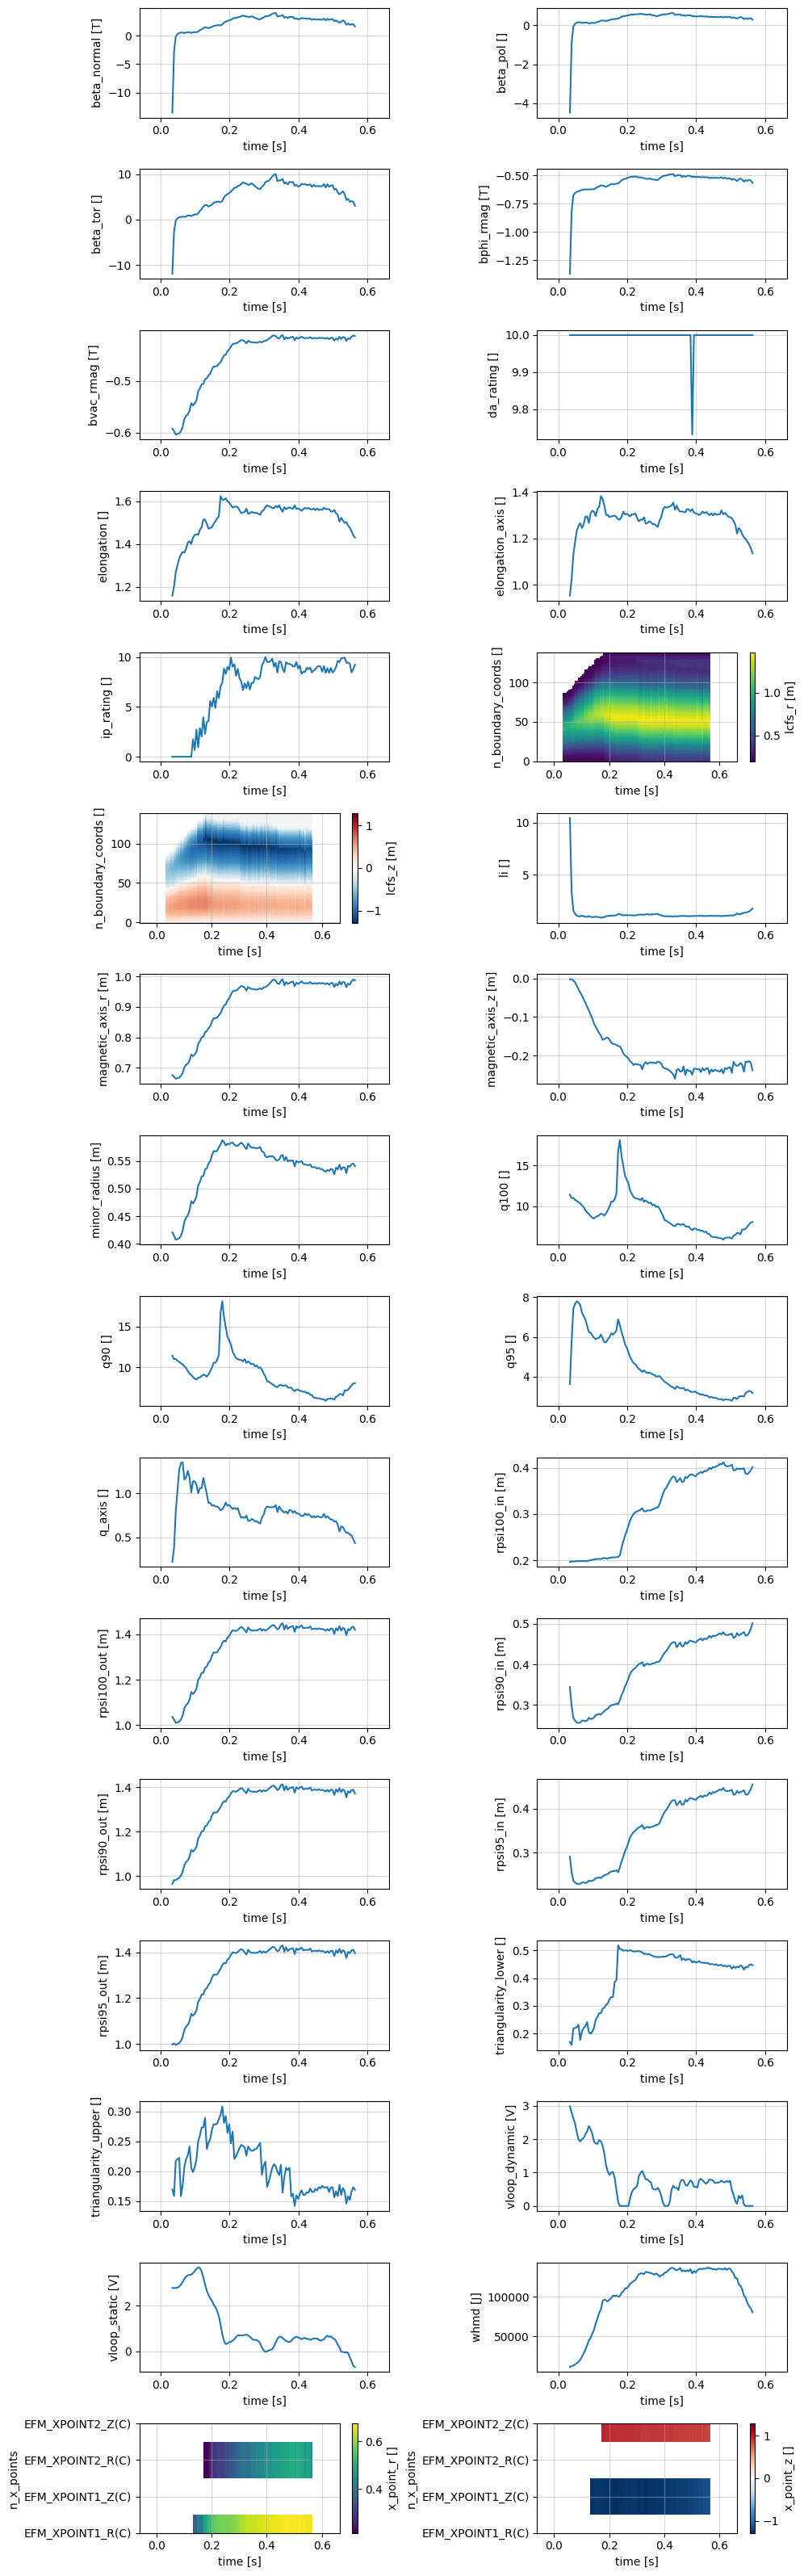

In [17]:
profiles = xr.open_zarr(store, group='equilibrium')

profile_1d = profiles.drop_vars(['j_tor', 'psi', 'q'])
plot_1d_profiles(profile_1d)

profiles

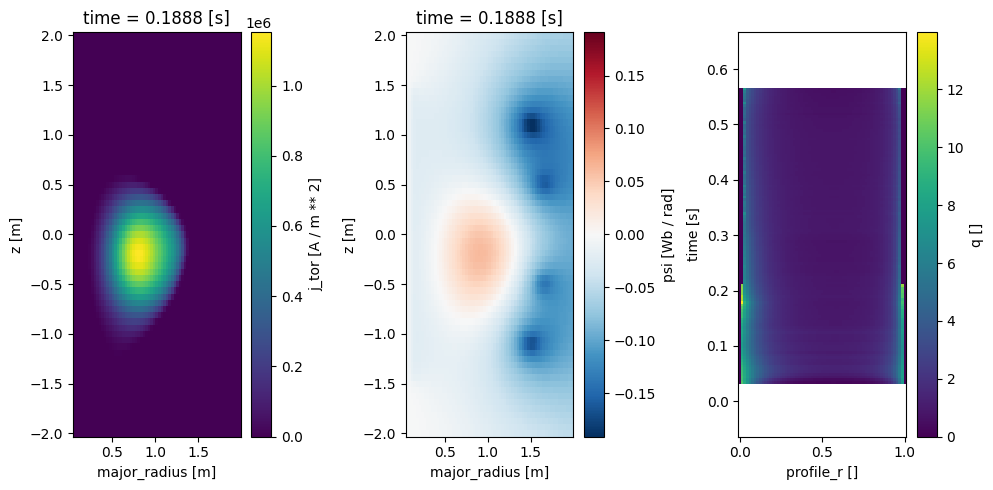

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

profiles['j_tor'].isel(time=50).plot(ax=axes[0], x='major_radius')
profiles['psi'].isel(time=50).plot(ax=axes[1], x='major_radius')
profiles['q'].plot(ax=axes[2])
plt.tight_layout()

### Gas Injection

<xarray.Dataset> Size: 116kB
Dimensions:         (time: 2906)
Coordinates:
  * time            (time) float64 23kB -0.0612 -0.06095 ... 0.6648 0.665
Data variables:
    inboard_total   (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    outboard_total  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    pressure        (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
    total_injected  (time) float64 23kB dask.array<chunksize=(2906,), meta=np.ndarray>
Attributes:
    description:  
    imas:         gas_injection
    label:        Integrated total gas
    name:         gas_injection
    uda_name:     AGA_INTEG_GAS
    units:        count

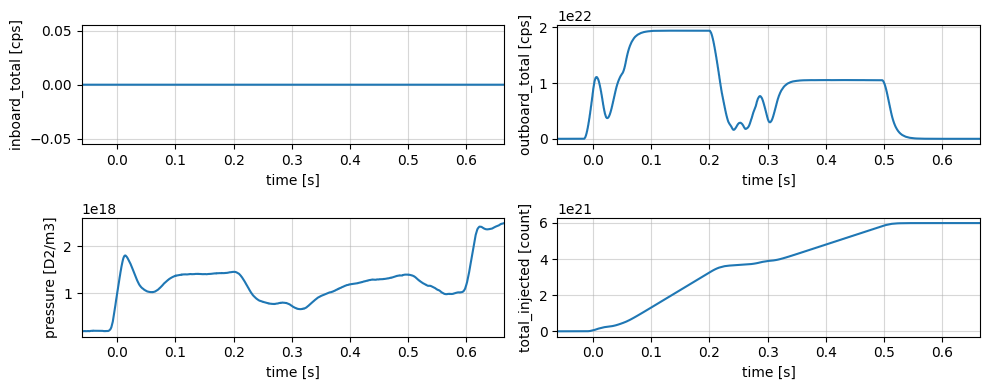

In [23]:
profiles = xr.open_zarr(store, group='gas_injection')

plot_1d_profiles(profiles)
# profiles['valve_voltage'].plot.line(x='time', ax=axes)
plt.tight_layout()
profiles

### Cameras

In [ ]:
profiles = xr.open_zarr(store, group='camera_visible')

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
index = 250
profiles['camera_center'].isel(time=index).plot(ax=axes[0])
profiles['camera_lower'].isel(time=index).plot(ax=axes[1])
if 'camera_color' in profiles:
    axes[2].imshow(profiles['camera_color'].isel(time=index).values)
plt.tight_layout()

profiles
